In [1]:
import numpy
import matplotlib as mpl
from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot

from IPython.core.pylabtools import figsize, getfigs

from pylab import *
from numpy import *

import json

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['grid.color'] = "#CCCCCC"
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['figure.edgecolor'] = 'none'
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

mpl.rcParams["font.size"] = SMALL_SIZE # controls default text sizes
mpl.rcParams["axes.titlesize"] = SMALL_SIZE # fontsize of the axes title
mpl.rcParams["axes.labelsize"] = BIGGER_SIZE # fontsize of the x and y labels
mpl.rcParams["xtick.labelsize"] = MEDIUM_SIZE # controls default text sizes
mpl.rcParams["ytick.labelsize"] = MEDIUM_SIZE # controls default text sizes
mpl.rcParams["legend.fontsize"] = MEDIUM_SIZE # legend fontsize
mpl.rcParams["figure.titlesize"] = BIGGER_SIZE # fontsize of the figure title

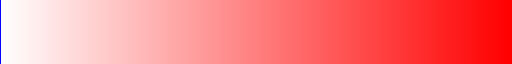

In [2]:
Cut = 1e-3
jsw_cmap = matplotlib.colors.LinearSegmentedColormap('blue_to_red', {'red': [(0.0, 0.0, 0.0),
                                                                  (Cut/255, 0.0, 1.0),
                                                                  (255.0/255, 1.0, 1.0)],
                                                          'green': [(0.0, 0.0, 0.0),
                                                                    (Cut/255, 0.0, 1.0),
                                                                    (255.0/255, 0.0, 0.0)],
                                                          'blue': [(0.0, 1.0, 1.0),
                                                                   (Cut/255, 1.0, 1.0),
                                                                   (255.0/255, 0.0, 0.0)]}, N=256*10)
jsw_cmap

In [3]:
z = 0.07
q = 0.15
# x goes from 0 to 255, inclusive
# From 0 to q, we should go from 0 to z
# From q to 255, we should go from z to 1
def forward(x):
    return ((z * (x/q)) * (x < q)) + (((1-z) * (x-q) / (255-q) + z) * (x >= q))
    
# y goes from 0 to 1, inclusive
# From 0 to z, we should go from 0 to 1
# From z to 1, we should go from 1 to 255
def inverse(y):
    return ((((q)*y/z - q)) * (y < z)) + (((y-z) / (1 - z) * (255-q) + q) * (y >= z))

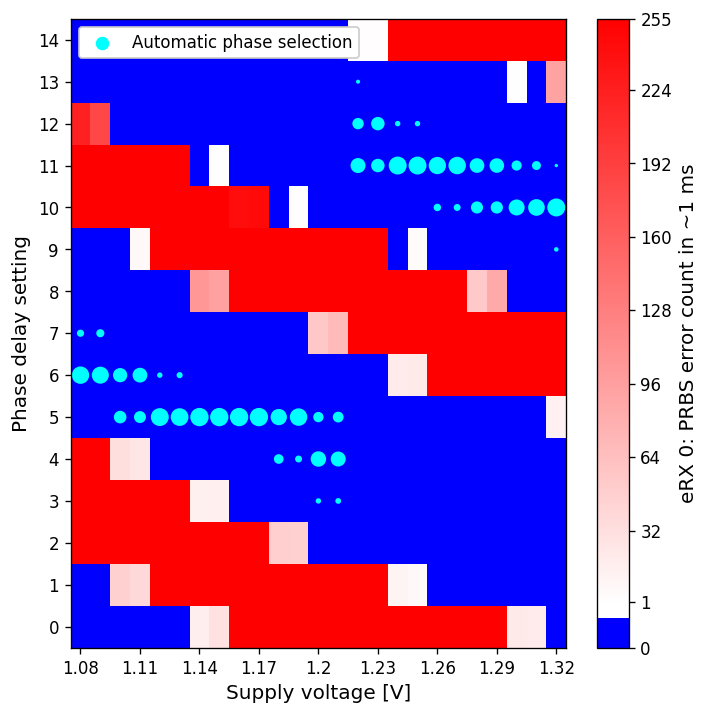

In [39]:
with open("data/econd/phase_scan_voltage/report_2023-08-21T15_24_38.550286.json") as jsonfile:
    J = json.load(jsonfile)

counts = array([[bincount(array([J['tests'][k]['metadata']['final_phase_select'] for k in range(25)])[V,:,E], minlength=15) for V in range(25)] for E in range(12)])
X, Y = meshgrid(arange(25), arange(15))


fig, ax = subplots(nrows=1, ncols=1, figsize=(6*1, 6*1), dpi=120)
for eRX in range(1):
    sca(ax)
    pcm = pcolormesh(arange(26)-0.5, arange(16)-0.5, array([J['tests'][k]['metadata']['eRX_errcounts'] for k in range(25)])[:,:,eRX].T,
               cmap=jsw_cmap, vmin=0, vmax=255, linewidth=0)
    pcm.set_edgecolor('face')
    cb = colorbar(label='eRX 0: PRBS error count in ~1 ms')
    cb._set_scale(matplotlib.scale.FuncScale(cb._long_axis(), (forward, inverse)))
    cb.set_ticks([0, 1, 32, 64, 96, 128, 160, 192, 224, 255])
    cb.set_ticks([], minor=True)
    # plot(array([J['tests'][k]['metadata']['initial_phase_select'] for k in range(25)])[:,eRX], marker='_', color='red', ls='none')
    scatter(X, Y, s=counts[eRX].T, color='cyan', label='Automatic phase selection')
    # plot(array([J['tests'][k]['metadata']['final_phase_select'] for k in range(25)])[:,0,eRX], marker='o', color='cyan', ls='none', label='phase select, track mode 2')
    # plot(array([J['tests'][k]['metadata']['final_phase_select'] for k in range(25)])[:,1:,eRX], marker='o', color='cyan', ls='none')
    legend(loc='upper left', framealpha=1)
    xticks(arange(25)[::3], around(linspace(1.08, 1.32, 25)[::3], 2))
    xlabel('Supply voltage [V]')
    yticks(arange(15))
    ylabel(f'Phase delay setting')
tight_layout()
savefig('plots/eRX0_phase_scan_good_econd.pdf')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


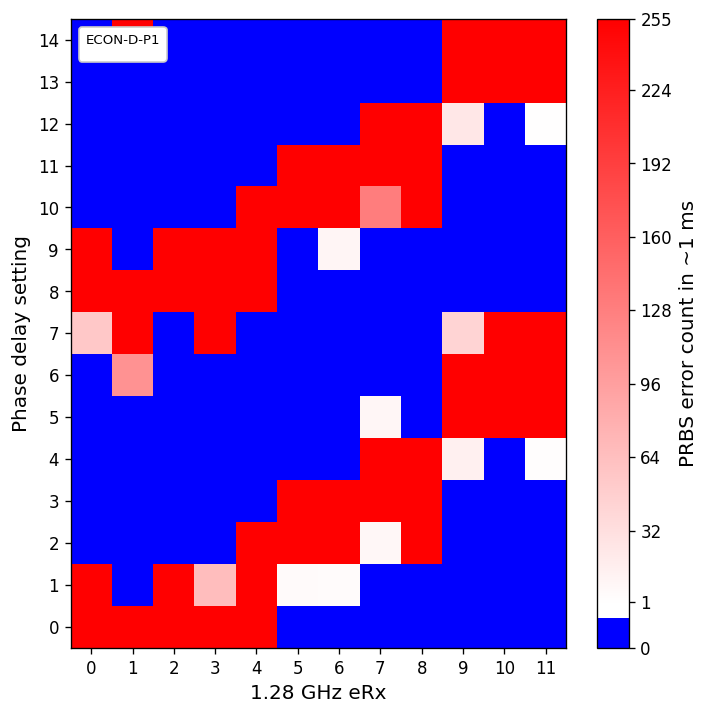

In [40]:
counts = array([J["tests"][k]["metadata"]["eRX_errcounts"] for k in range(len(J['tests'])) if J["tests"][k]["nodeid"] == "test_TID.py::test_ePortRXPRBS[1.2]"][0])

fig, ax = subplots(nrows=1, ncols=1, figsize=(6*1, 6*1), dpi=120)
sca(ax)
pcm = pcolormesh(arange(13)-0.5, arange(16)-0.5, 
                 counts,
                 cmap=jsw_cmap, 
                 vmin=0, vmax=255, linewidth=0)
pcm.set_edgecolor('face')
cb = colorbar(label='PRBS error count in ~1 ms')
cb._set_scale(matplotlib.scale.FuncScale(cb._long_axis(), (forward, inverse)))
cb.set_ticks([0, 1, 32, 64, 96, 128, 160, 192, 224, 255])
cb.set_ticks([], minor=True)
legend(loc='upper left', framealpha=1, title='ECON-D-P1')
xticks(arange(12))
xlabel('1.28 GHz eRx')
yticks(arange(15))
ylabel(f'Phase delay setting')
tight_layout()
savefig('plots/phase_scan_econd.pdf')

##### 